Homework #4


In [84]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def get_random_state():
   theta = np.random.random() * 2 * np.pi
   phi = np.random.random() * 2 * np.pi
   return np.cos(theta/2), np.exp(1j*phi) * np.sin(theta/2)

Random state:
alpha: 0.9881914694337453, beta: (-0.06878160272808717+0.13691862862492754j)
Single qubit circuit:
q1: ───Ry(0.098π)───Rz(0.648π)───M('result')───


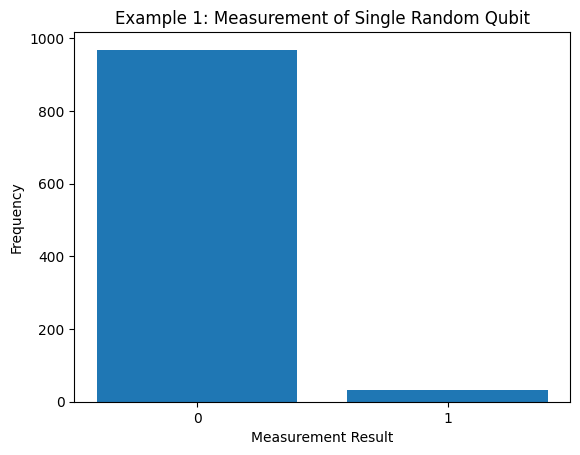


Results
Counter({0: 969, 1: 31})


In [86]:
# Create a qubit (|0⟩ state by default)
q1 = cirq.NamedQubit('q1') # Message Bit
q2 = cirq.NamedQubit('q2') # Alice Bit
q3 = cirq.NamedQubit('q3') # Bob Bit

# Get a random state
alpha, beta = get_random_state()
print("Random state:")
print(f"alpha: {alpha}, beta: {beta}")

# Create a circuit
circuit1 = cirq.Circuit()  # Single qubit circuit
circuit2 = cirq.Circuit()   # Two qubit circuit


theta = 2 * np.arccos(np.abs(alpha))
if np.abs(beta) > 1e-15:
   phi = np.angle(beta)
else:
   phi = 0

circuit1.append(cirq.ry(theta)(q1))
if phi != 0:
   circuit1.append(cirq.rz(phi)(q1))
circuit1.append(cirq.measure(q1,key='result'))
print("Single qubit circuit:")
print(circuit1)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result1 = simulator.run(circuit1, repetitions=1000)

counts1 = result1.histogram(key='result')

plt.bar(counts1.keys(), counts1.values())
plt.xlabel('Measurement Result')
plt.ylabel('Frequency')
plt.title('Example 1: Measurement of Single Random Qubit')
plt.xticks([0, 1])
plt.show()

print('\nResults')
print(counts1)



Circuit:
q1: ───Ry(0.098π)───Rz(0.648π)───M───@───H───@─────────────────
                                     │       │
q2: ───H────────────@────────────M───X───@───┼─────────────────
                    │                    │   │
q3: ────────────────X────────────M───────X───@───M('result')───


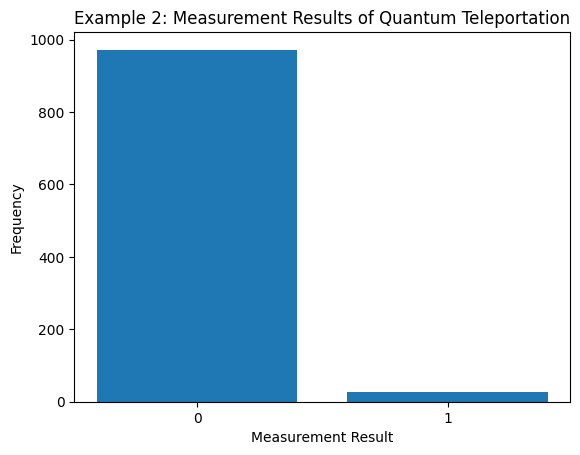


Results:
Counter({0: 972, 1: 28})


In [87]:
theta = 2 * np.arccos(np.abs(alpha))
if np.abs(beta) > 1e-15:
   phi = np.angle(beta)
else:
   phi = 0

circuit2.append(cirq.ry(theta)(q1))
if phi != 0:
   circuit2.append(cirq.rz(phi)(q1))
circuit2.append(cirq.measure(q1))

# Apply the Hadamard gate to first qubit and CNOT gate to both qubits
# Create entangled state
circuit2.append([cirq.H(q2), cirq.CNOT(q2, q3)])

#Measure both qubits
circuit2.append([cirq.measure(q2), cirq.measure(q3)])

# Bell measurement of the Message and Alice's entangled qubit.
circuit2.append([cirq.CNOT(q1, q2), cirq.H(q1)])

# Uses the two classical bits from the Bell measurement to recover the
# original quantum message on Bob's entangled qubit.
circuit2.append([cirq.CNOT(q2, q3), cirq.CZ(q1, q3)])

# Measure the final state of Bob's qubit
circuit2.append(cirq.measure(q3, key='result'))

print("Circuit:")
print(circuit2)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result2 = simulator.run(circuit2, repetitions=1000)

counts2 = result2.histogram(key='result')

plt.bar(counts2.keys(), counts2.values())
plt.xlabel('Measurement Result')
plt.ylabel('Frequency')
plt.title('Example 2: Measurement Results of Quantum Teleportation')
plt.xticks([0, 1])
plt.show()

#Print the results
print("\nResults:")
print(counts2)